In [111]:
import sys
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  

In [17]:
curdir = os.path.abspath(os.path.curdir)
sys.path.append(os.path.join(os.path.dirname(curdir), 'tf_pose'))

In [21]:
from pycocotools.coco import COCO

In [22]:
dataset_path = '/home/artia/datasets'

In [23]:
coco = COCO(os.path.join(dataset_path, 'annotations/person_keypoints_val2017.json'))

loading annotations into memory...
Done (t=0.20s)
creating index...
index created!


In [329]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
img_info = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

{'license': 5, 'file_name': '000000094944.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000094944.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-20 04:02:11', 'flickr_url': 'http://farm5.staticflickr.com/4008/4414517057_541fe5e979_z.jpg', 'id': 94944}


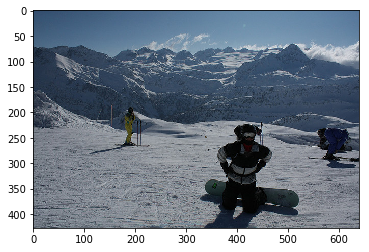

In [330]:
print(img_info)
filename = img_info['file_name']
img = cv2.imread(os.path.join(dataset_path, 'val2017', filename))[:,:,::-1]
plt.imshow(img)

In [331]:
img_info['id']

94944

In [332]:
coco.getAnnIds(img_info['id'])

[435114, 435308, 1231569]

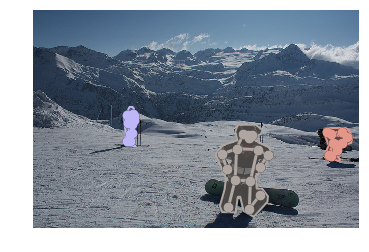

In [333]:
annIds = coco.getAnnIds(imgIds=img_info['id'], catIds=catIds, iscrowd=None) #get annotations ids of the image
anns = coco.loadAnns(annIds) #get annotation infomation of that image

#show the annotation on the image.
plt.imshow(img); plt.axis('off')
coco.showAnns(anns) 

In [334]:
polygons = []
color = []

c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]

In [335]:
from matplotlib.patches import Polygon

In [336]:
print(anns[0])

{'segmentation': [[367.64, 378.17, 375.3, 351.37, 378.17, 329.35, 358.07, 283.39, 371.47, 264.24, 400.19, 254.67, 396.36, 237.43, 401.15, 224.03, 421.26, 224.03, 436.57, 224.03, 449.98, 234.56, 447.11, 242.22, 436.57, 247.01, 435.62, 254.67, 463.38, 269.03, 467.21, 283.39, 448.06, 314.98, 436.57, 324.56, 438.49, 349.45, 449.02, 349.45, 460.51, 364.77, 459.55, 375.3, 432.74, 404.98, 412.64, 393.49, 405.94, 365.73, 401.15, 365.73, 397.32, 396.36, 370.51, 395.41, 365.73, 383.92]], 'num_keypoints': 15, 'area': 12583.68655, 'iscrowd': 0, 'keypoints': [424, 250, 2, 429, 245, 2, 421, 245, 2, 0, 0, 0, 412, 243, 2, 440, 273, 2, 399, 271, 2, 460, 284, 2, 370, 282, 2, 444, 308, 2, 380, 312, 2, 426, 334, 2, 396, 333, 2, 424, 389, 2, 383, 385, 2, 445, 362, 2, 0, 0, 0], 'image_id': 94944, 'bbox': [358.07, 224.03, 109.14, 180.95], 'category_id': 1, 'id': 435114}


In [337]:
poly.shape

(24, 1, 2)

In [338]:
np.array(seg).reshape((int(len(seg)/2), 2))

array([[386.16, 333.3 ],
       [436.85, 345.17],
       [442.25, 316.04],
       [434.7 , 247.01],
       [446.56, 215.73],
       [481.08, 194.16],
       [470.29, 139.15],
       [486.47, 122.97],
       [518.83, 117.57],
       [538.25, 149.93],
       [555.51, 197.39],
       [573.84, 217.89],
       [605.12, 297.71],
       [610.52, 332.22],
       [640.  , 363.51],
       [634.25, 376.45],
       [626.7 , 381.84],
       [580.31, 346.25],
       [490.79, 363.51],
       [464.9 , 335.46],
       [480.  , 386.16],
       [395.87, 382.92],
       [359.19, 349.48],
       [371.06, 337.62]])

In [339]:
len(anns[0]['segmentation'][0])

58

In [340]:
contours = []
for ann in anns:
    if 'segmentation' in ann:
        if type(ann['segmentation']) == list:
            # polygon
            for seg in ann['segmentation']:
                poly = np.array(seg).reshape((-1, 1, 2)).astype(np.int32)
                contours.append(poly)

print(len(contours))

3


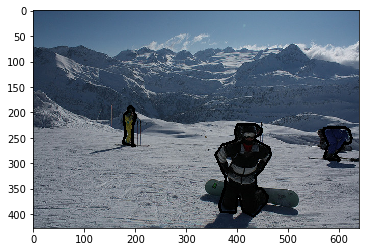

In [341]:
plt.imshow(cv2.drawContours(img.copy(), contours, -1, (0, 0, 0), 3))

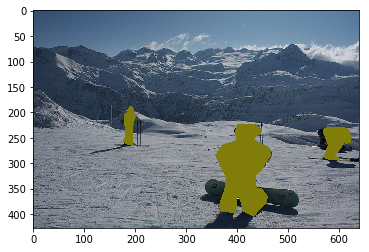

In [342]:
test = img.copy()
plt.imshow( cv2.drawContours(test, contours, -1, (128, 125, 10), -1) )

In [343]:
mask = cv2.inRange(test, (128, 125, 10), (128, 125, 10))

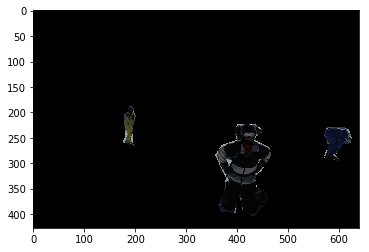

In [344]:
res = cv2.bitwise_and(img,img, mask= mask)
plt.imshow(res)

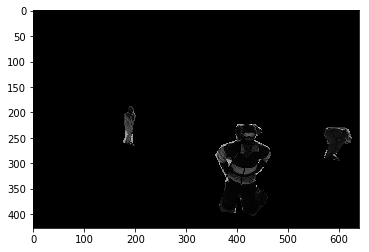

In [345]:
gray_image = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

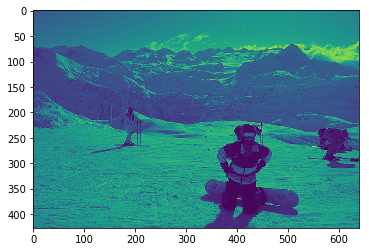

In [371]:
s = img.copy()
gray_image = cv2.cvtColor(s, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image)
high_thresh, thresh_im = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lowThresh = 0.5*high_thresh

edged = cv2.Canny(gray_image, lowThresh, high_thresh)

In [ ]:
double otsu_thresold = Imgproc.threshold(mGray,edged,0,255, Imgproc.THRESH_OTSU);
Imgproc.Canny(mRgba, edged, otsu_thresold*0.5,otsu_thresold);

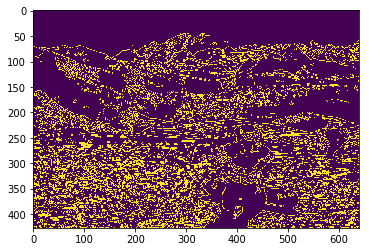

In [372]:
plt.imshow(edged)

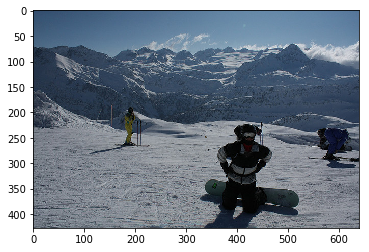

In [360]:
s = img.copy()
plt.imshow(s)
res = cv2.bitwise_and(s,s, mask= mask)
gray_image = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
v = np.median(gray_image)

sigma = 0.33
#---- apply automatic Canny edge detection using the computed median----
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edged = cv2.Canny(gray_image, lower, upper)
cv2.imshow('Edges',edged)

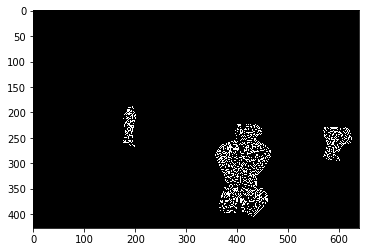

In [361]:
plt.imshow(edged, cmap='gray')

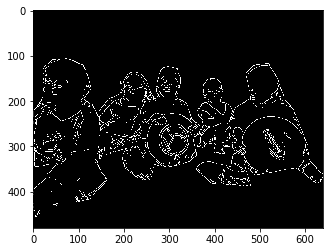

In [279]:

gray_image = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray_image, (3, 3), 0)
v = np.median(gray_image)

#---- apply automatic Canny edge detection using the computed median----
sigma=0.33
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edged = cv2.Canny(blurred, 200, 201)
plt.imshow(edged, cmap='gray')
result, thresh = cv2.threshold(edge_mask,127,255,cv2.THRESH_BINARY_INV)


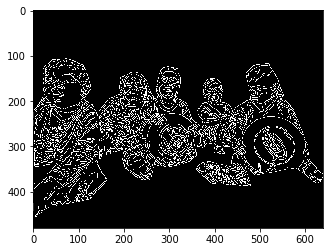

In [245]:
plt.imshow(edge_mask, cmap='gray')

In [238]:
result, thresh = cv2.threshold(edge_mask,127,255,cv2.THRESH_BINARY_INV)

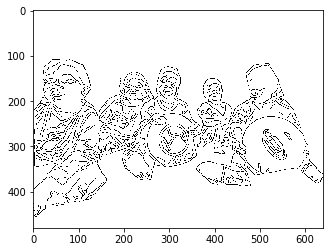

In [241]:
plt.imshow(thresh, cmap='gray')

In [ ]:
mean = np.mean(edgeImg);
# Zero any value that is less than mean. This reduces a lot of noise.
edgeImg[edgeImg <= mean] = 0;